# Dependencies

In [60]:
import cv2
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"
from retinaface import RetinaFace
import matplotlib.pyplot as plt
import dlib
import numpy as np

# Picture import

In [38]:
image_path = 'own-pictures/Jennifer.png'
img_cv2 = cv2.imread(image_path)

# Detection

{'face_1': {'score': 0.9995079040527344, 'facial_area': [43, 110, 243, 356], 'landmarks': {'right_eye': [103.65116, 183.363], 'left_eye': [185.30804, 233.09177], 'nose': [110.146935, 260.10934], 'mouth_right': [63.11398, 276.17285], 'mouth_left': [127.56889, 319.00867]}}}


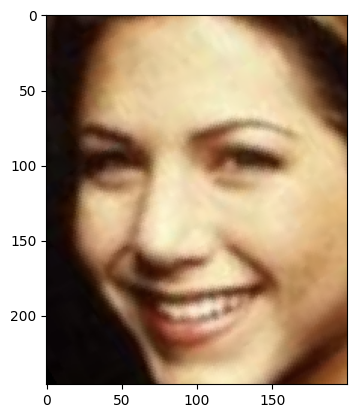

In [39]:
det_faces = RetinaFace.detect_faces(image_path)
print(det_faces)

faces = RetinaFace.extract_faces(img_path = image_path, align = True)
plt.imshow(faces[0])
plt.show()

# Alignment

In [40]:
# Done in detection section (for this time)
# Might use other more complicated alignment methods later

# Normalization

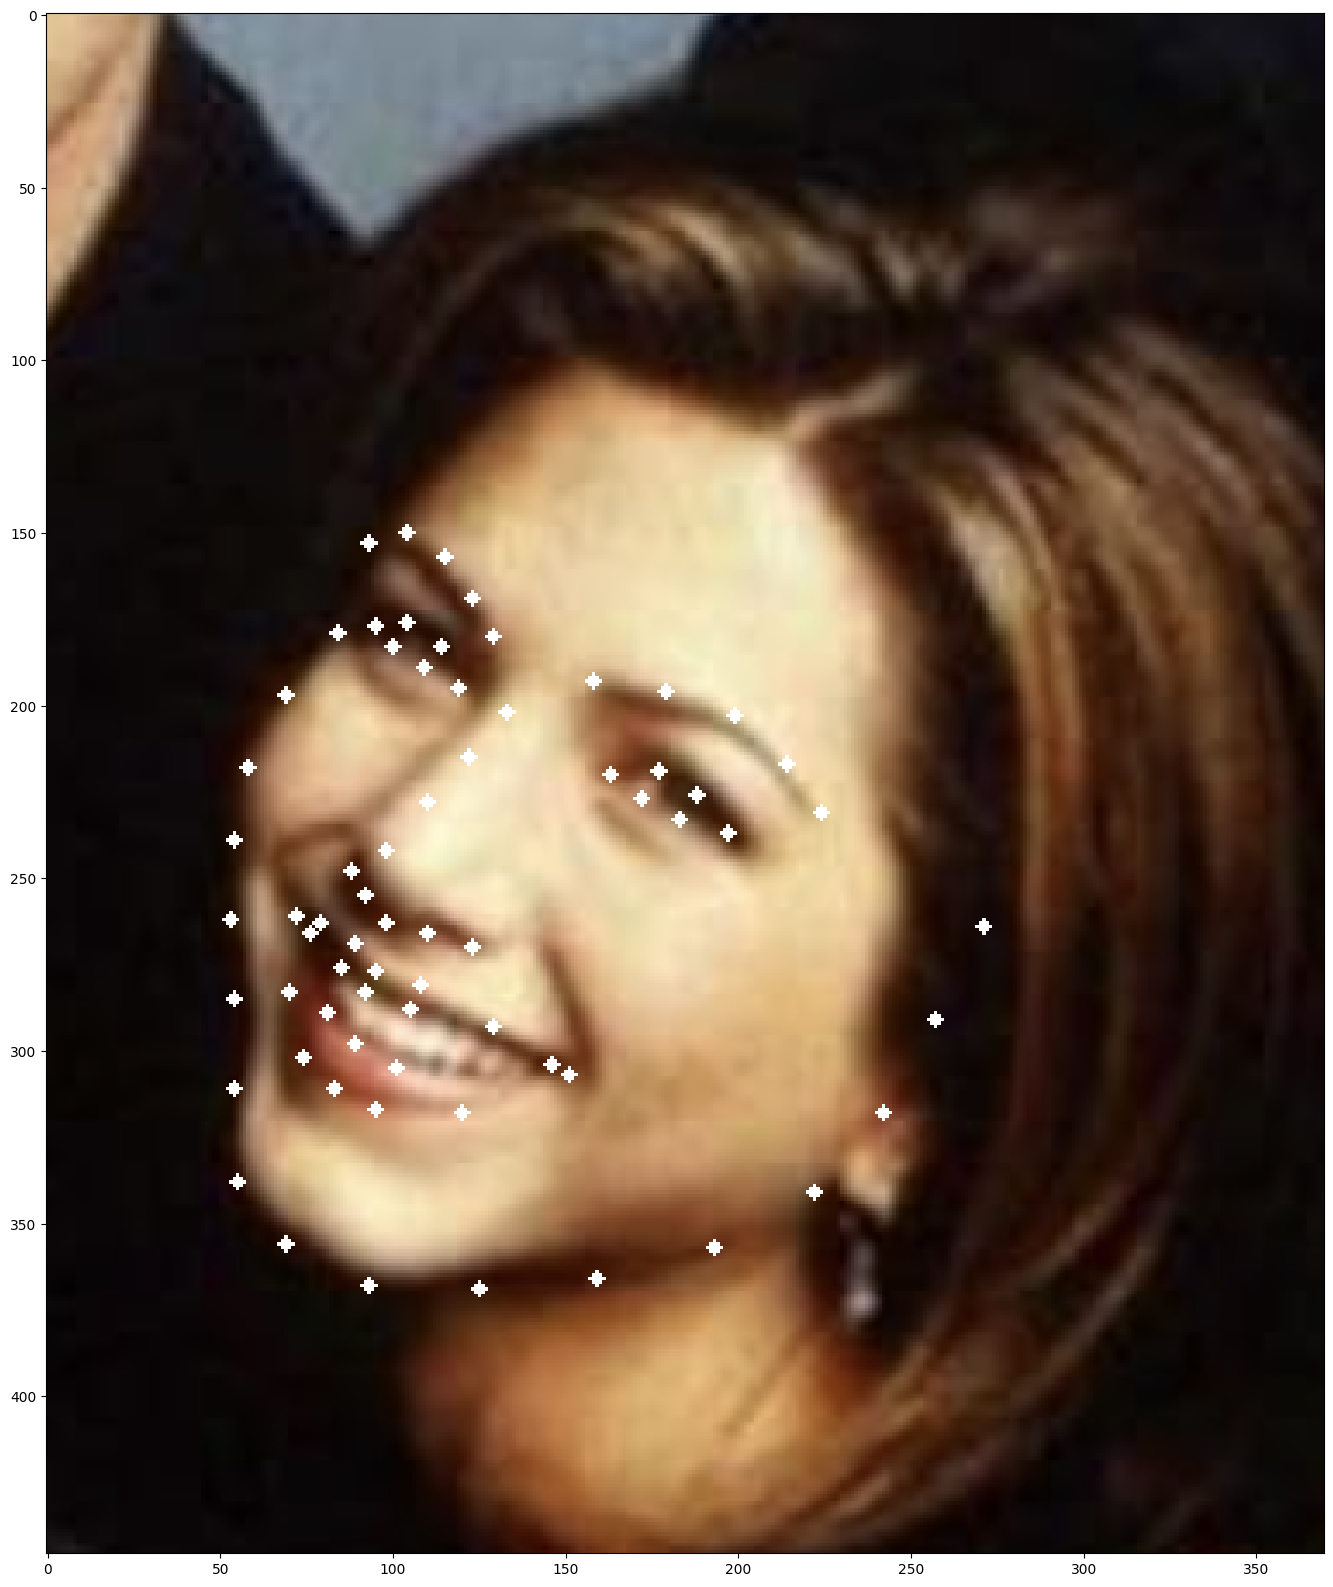

In [45]:
landmark_detector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

face_detector = dlib.get_frontal_face_detector()

img = dlib.load_rgb_image(image_path)

dlib_faces = face_detector(img, 1)

landmarks = landmark_detector(img, dlib_faces[0])

landmarks_tuple = []

base_img = img.copy()

for i in range(0,68):
    x = landmarks.part(i).x
    y = landmarks.part(i).y

    landmarks_tuple.append((x, y))

    cv2.circle(base_img, (x,y), 2, (255, 255, 255), -1)

plt.figure(figsize = (20,20))
plt.imshow(base_img)

In [71]:
routes = [i for i in range(16, -1, -1)] + [i for i in range(17, 27)] + [16]
routes_coordinates = []

base_img = img.copy()
for i in range(0, len(routes) - 1):
    source_point = routes[i]
    target_point = routes[i+1]

    source_coordinate = landmarks_tuple[source_point]
    target_coordinate = landmarks_tuple[target_point]

    routes_coordinates.append(source_coordinate)

    cv2.line(base_img, source_coordinate, target_coordinate, (255, 255, 255), 2)

routes_coordinates = routes_coordinates + [routes_coordinates[0]]

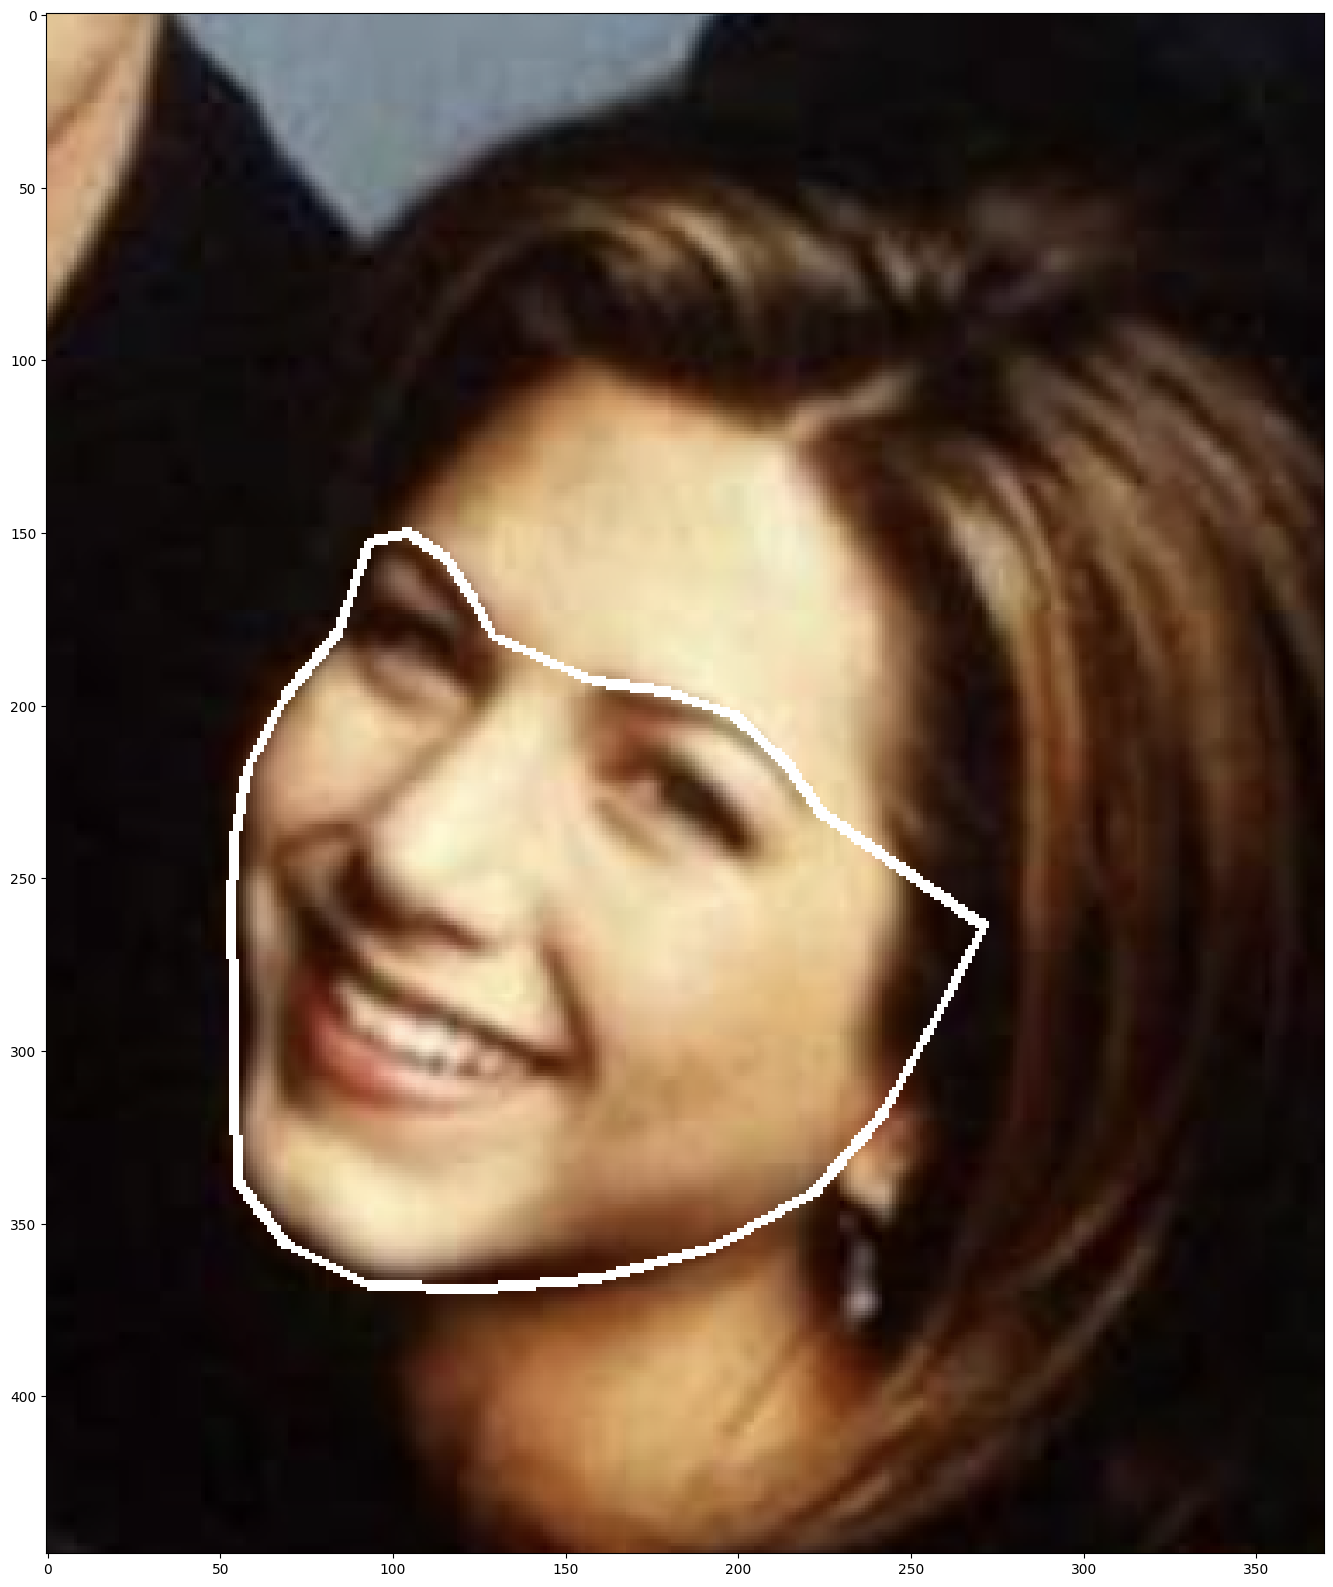

In [72]:
plt.figure(figsize = (20,20))
plt.imshow(base_img)

In [73]:
mask = np.zeros((img.shape[0], img.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes_coordinates), 1)
mask = mask.astype(bool)
out = np.zeros_like(img)
out[mask] = img[mask]

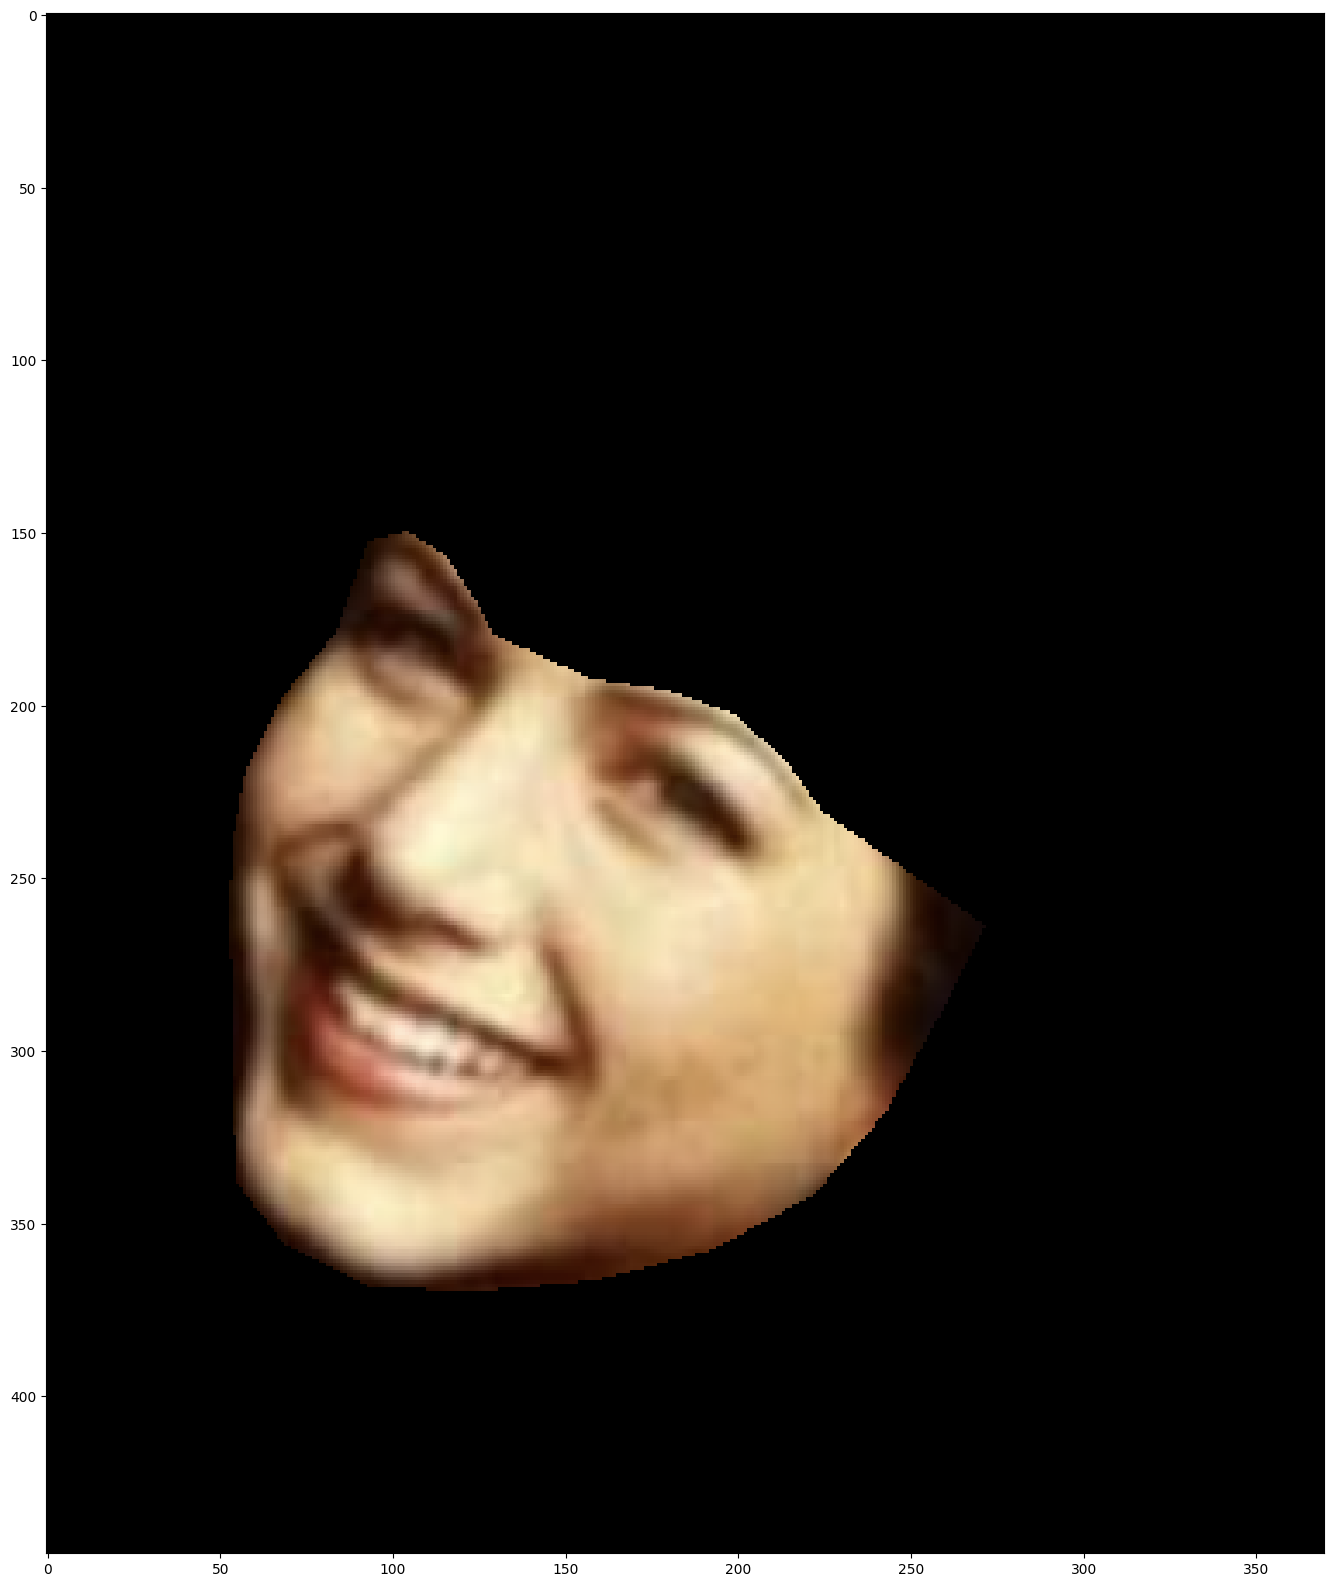

In [74]:
plt.figure(figsize = (20,20))
plt.imshow(out)

# Representation

# Verification